In [146]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [15]:
#Read the dataset
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [17]:
#Checking the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [19]:
#Shape of dataset
df.shape

(338199, 9)

In [21]:
#Checking the null value
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [23]:
#Drop the null value
df = df_nasa.dropna()

In [25]:
#checking the null value after dropping 
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [29]:
#Statistical Description of dataset
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [31]:
#Checking the duplicates
df.duplicated().sum()

0

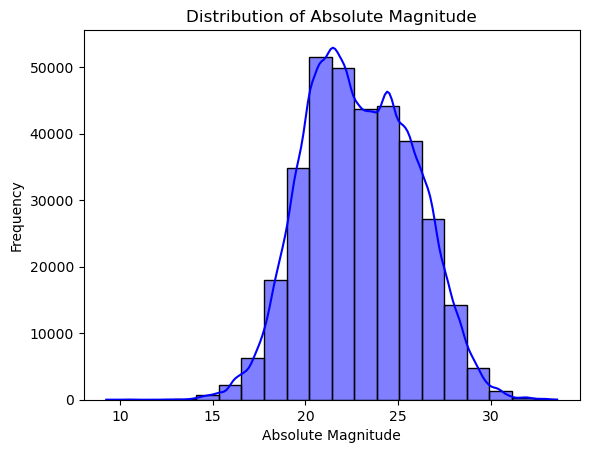

In [33]:
#  Histogram of Absolute Magnitude
sns.histplot(df['absolute_magnitude'], bins=20, kde=True, color='blue')
plt.title("Distribution of Absolute Magnitude")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Frequency")
plt.show()

In [98]:
#Count for orbiting_body
df['orbiting_body'].value_counts()

orbiting_body
Earth    338171
Name: count, dtype: int64

In [100]:
# Drop unwanted columns
df = df.drop(columns=['neo_id', 'name', 'orbiting_body'])

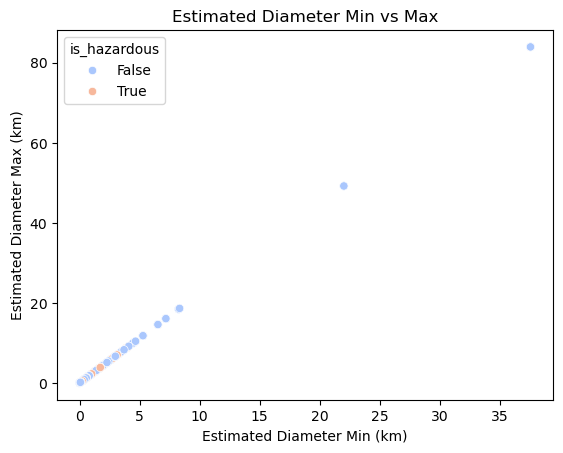

In [35]:
#  Scatter Plot of Estimated Diameter (Min vs Max)
sns.scatterplot(x=df['estimated_diameter_min'], y=df['estimated_diameter_max'], hue=df['is_hazardous'], palette='coolwarm')
plt.title("Estimated Diameter Min vs Max")
plt.xlabel("Estimated Diameter Min (km)")
plt.ylabel("Estimated Diameter Max (km)")
plt.show()

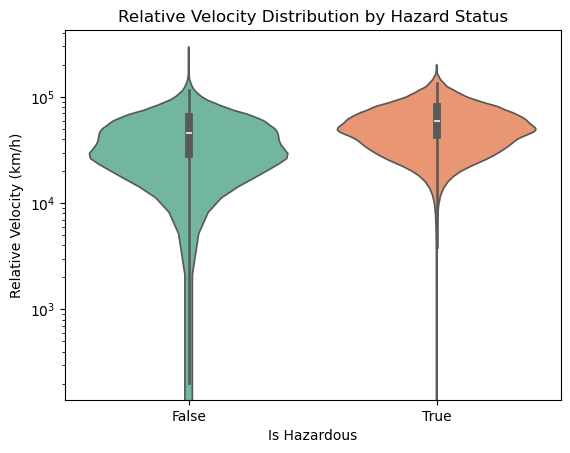

In [90]:
#  Boxplot of Relative Velocity
sns.violinplot(x=df['is_hazardous'], y=df['relative_velocity'], palette='Set2')
plt.title("Relative Velocity Distribution by Hazard Status")
plt.xlabel("Is Hazardous")
plt.ylabel("Relative Velocity (km/h)")
plt.yscale('log')
plt.show()

In [63]:
df['is_hazardous'] = df['is_hazardous'].astype(str)


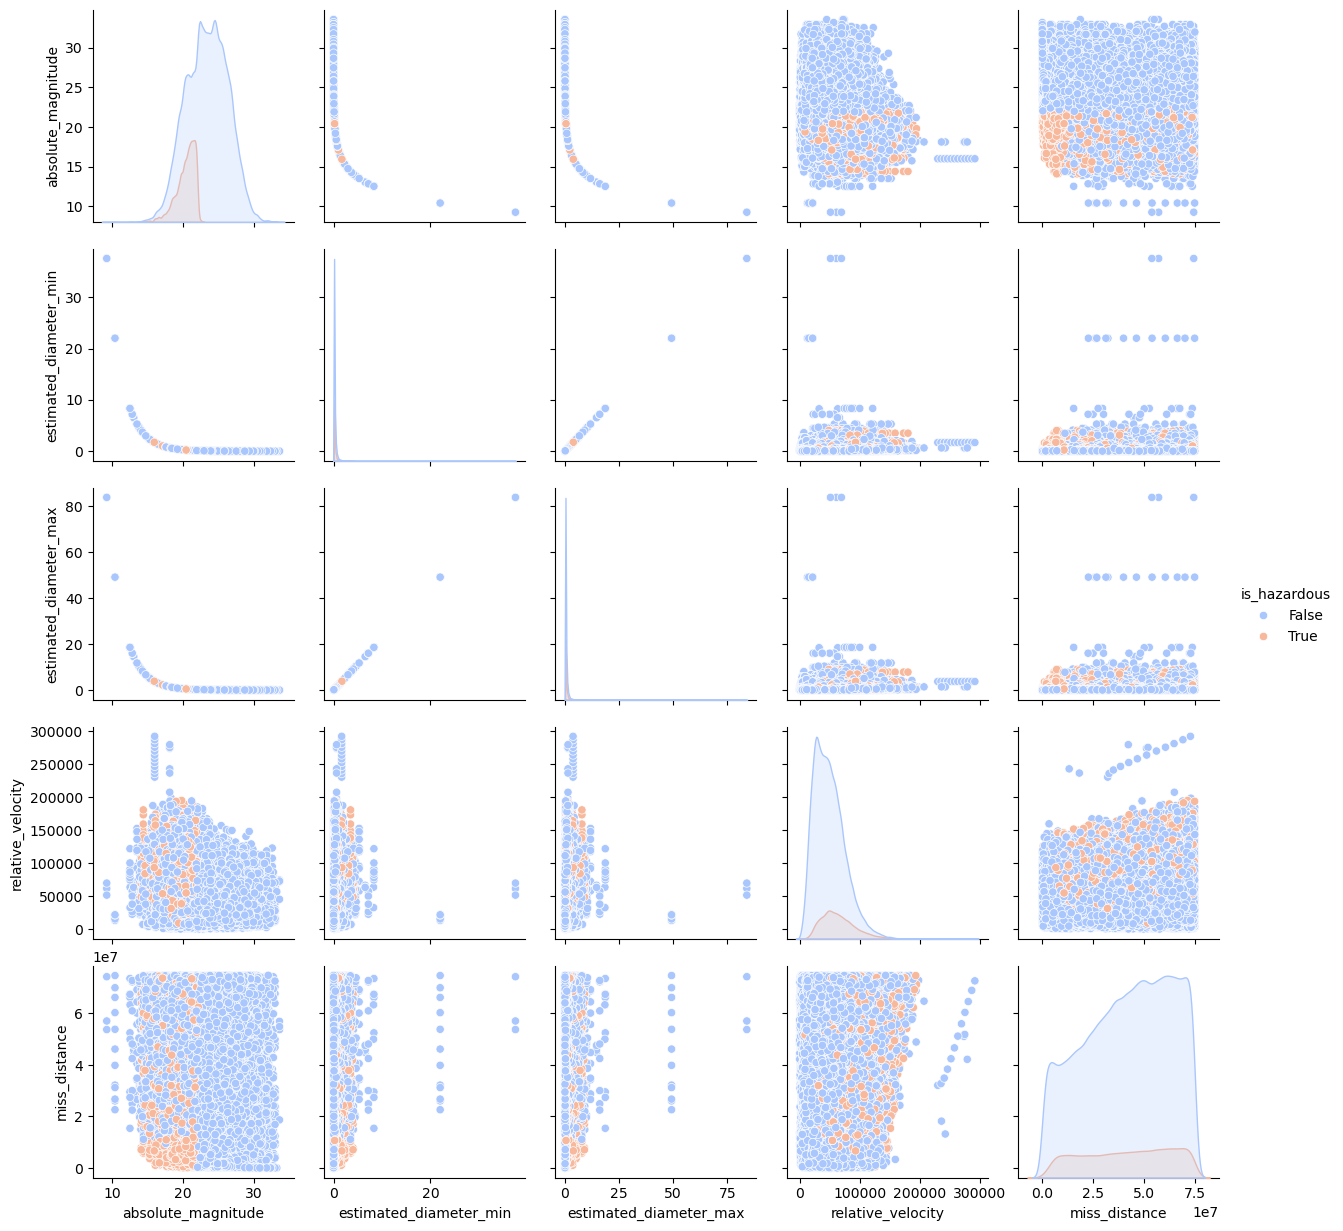

In [59]:
#Pairplot
sns.pairplot(df[['absolute_magnitude', 'estimated_diameter_min', 
                 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 
                 'is_hazardous']], hue='is_hazardous', palette='coolwarm')
plt.show()


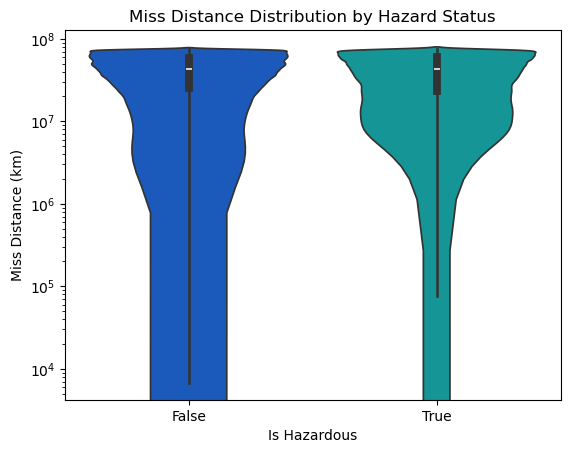

In [65]:
#  Violin Plot for Miss Distance
sns.violinplot(x=df['is_hazardous'], y=df['miss_distance'], palette='winter')
plt.title("Miss Distance Distribution by Hazard Status")
plt.xlabel("Is Hazardous")
plt.ylabel("Miss Distance (km)")
plt.yscale('log')
plt.show()

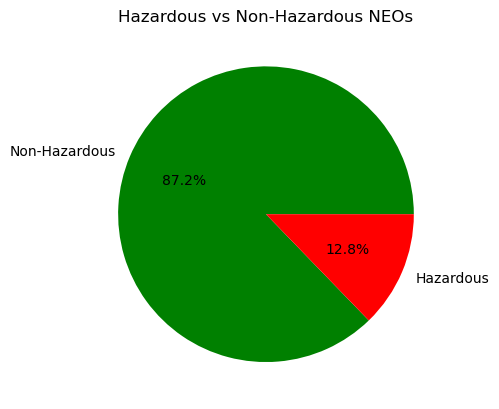

In [73]:
#  Pie Chart for Hazardous vs Non-Hazardous NEOs
df['is_hazardous'].value_counts().plot.pie(autopct="%.1f%%", colors=['green', 'red'], labels=['Non-Hazardous', 'Hazardous'])
plt.title("Hazardous vs Non-Hazardous NEOs")
plt.ylabel("")
plt.show()

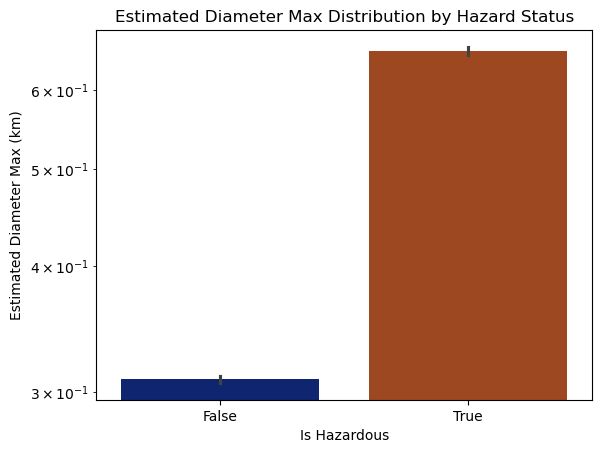

In [80]:
#  Barplot for Estimated Diameter
sns.barplot(x=df['is_hazardous'], y=df['estimated_diameter_max'], palette='dark')
plt.title("Estimated Diameter Max Distribution by Hazard Status")
plt.xlabel("Is Hazardous")
plt.ylabel("Estimated Diameter Max (km)")
plt.yscale('log')
plt.show()

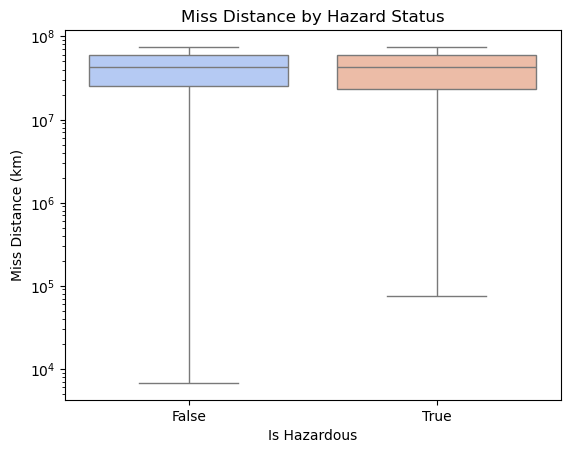

In [78]:
#  Boxplot for Miss Distance
sns.boxplot(x=df['is_hazardous'], y=df['miss_distance'], palette='coolwarm')
plt.title("Miss Distance by Hazard Status")
plt.xlabel("Is Hazardous")
plt.ylabel("Miss Distance (km)")
plt.yscale('log')
plt.show()

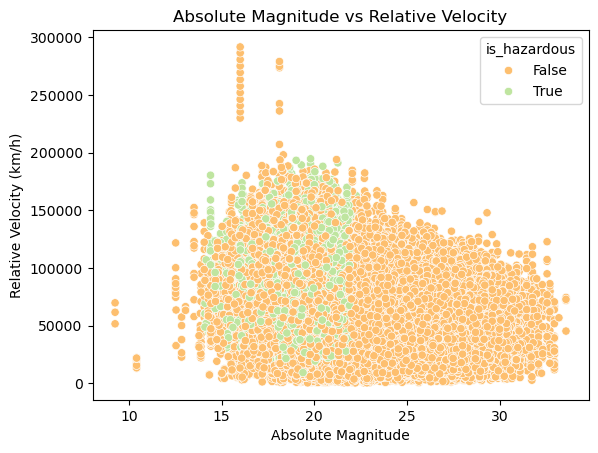

In [82]:
#  Scatter Plot of Absolute Magnitude vs Relative Velocity
sns.scatterplot(x=df['absolute_magnitude'], y=df['relative_velocity'], hue=df['is_hazardous'], palette='Spectral')
plt.title("Absolute Magnitude vs Relative Velocity")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Relative Velocity (km/h)")
plt.show()

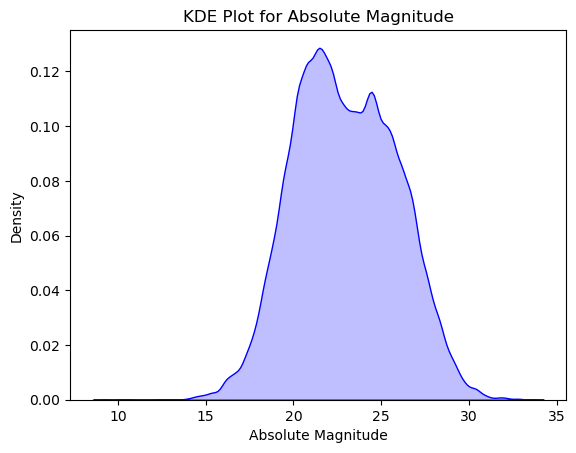

In [88]:
#  KDE Plot for Absolute Magnitude
sns.kdeplot(df['absolute_magnitude'], shade=True, color='blue')
plt.title("KDE Plot for Absolute Magnitude")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Density")
plt.show()

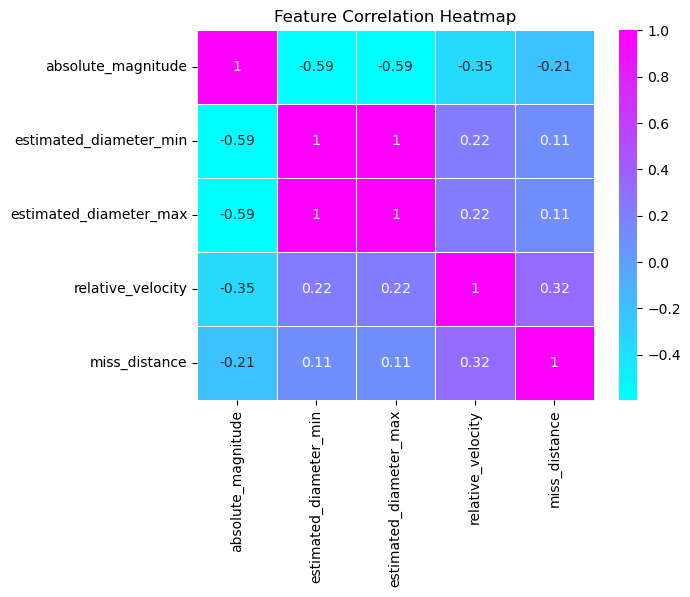

In [102]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap='cool', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()